# Narrative


The purpose of this project is to answer the questions:

1.) Does changing the number of masses 𝑁 affect the fundamental frequency  $\omega_1$ , the frequency of the first normal mode?

2.) Does changing the effective stiffness 𝐾 affect the fundamental frequency?

3.) Does changing the total mass  𝑀  affect the fundamental frequency?

# Things to know

To be able to answer these questions we first need to understand what we are trying to solve. The variables in the questions above are all components to make couple oscillators. Coupled oscilators are a combonation of balls and springs oscillating at certain rates. Depending on what values are set for each variable the frequency of the coupled oscillators would change. This then brings in the different types of modes for the oscillator. A mode is a multiple of the fundamental frequency represented by the variable $\omega$. With each multiple of omega the mode will. Visually a mode would like a hump or a section of the oscillator moving up and down really fast to form a bump. The higher the mode is, the more humps you will see on the coupled oscillator. Here is what the modes would look like using the swing of a pendulum. 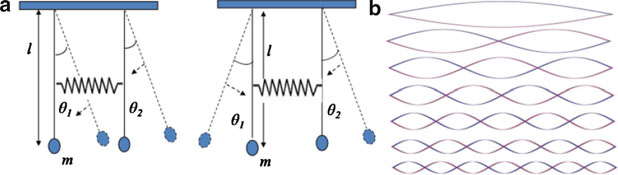. These questions will only be for the fundamental frequency(first mode) because all modes that come after the first one are multiples. This means that my results would be just a mutiple of the result of the fundamental frequency. 

## Getting started

Before conducting the experiment to answer the questions listed above I first had to create my system and then get the eigen values and vectors to be able to get the frequency of my system.  Understanding eigenvalues and vectors is crucial to be able to conduct the experiment below. An eigenvalue is the special set of scalars associated with the system of linear equations. Eigenvectors are the vectors (non-zero) that do not change the direction when any linear transformation is applied. (Defenitions of both eigenvalues and eigen vectors are from this website: [click this link](https://byjus.com/maths/eigen-values/)). The function geteigen allows me to obtain both the frequencies of the coupled oscillators in the system and also the eigenvectors for the system. Luckily for this project I will not be needing the eigenvectors since they do not have any signifagence as to solving the equations above. For the system I picked random yet realistic values for both the stiffness of the string, the number of masses, the mass of each string, and length of the string. The reason why I made these values to be global is so that I can access them whenever they are needed for each question. The properties of each mass represent the equations that form the system I will be using. I have them set as global variables, but once I get into solving the problems some of the equations will be put into the functions to solve each question. The reason why I am doing that is so my claculations can stay in the correct system instead of getting one value and then unvalidating the rest of the values since they would be calculated outside of the system. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# calculate eigenvalues and eigenvectors
from scipy.linalg import eigh
import pandas as pd #used for reading a data file
from scipy.optimize import curve_fit #used to find the fit parameters

In [3]:
def geteigen():
    """Calculate eigenvalues and eigenvectors for N coupled oscillators
    
    Keyword arguments: None
    
    Global variables: N, k
    
    Returns: frequences, array of eigenvectors
    """
    
    #Build matrices
    A=np.zeros((N,N))

    for i in range(N):
        A[i,i] = 2*k
        if i==0:
            A[0,i+1]=-k
        elif i==N-1:
            A[i,i-1]=-k
        else:
            A[i,i-1]=-k
            A[i,i+1]=-k

    B=m*np.identity(N)

    #find eigenvalues and eigenvectors
    lamb, a = eigh(A, B) # eigenvalues and eigenvectors
    omegas = np.sqrt(lamb) #frequencies
    
    return omegas, a

In [4]:
#global variables

#properties of the system
M = 12.0 #mass of string in kg
L = 10.0 #length of string in m
K = 1.0 #effective stiffness in N/m
N = 2 #number of masses

#properties of each mass
m = M/N
L0 = L/(N+1)
k = K*(N+1)

## Question 1

Starting off with question 1, I first created two lists: one to hold the values of N and other holding the values of $\omega$ aka frequencies. Then using a for loop I looped through 200 interations of N starting at N = 2. The reason for this is that a coupled oscillator has to have at least 2 masses(one on each side of the spring). Since N is changing and the system that I created uses N, I had to add the equations used to define my system into the loop. This allows all the frequencies that I collect to still be in the same system even after N changes. Using the function geteigen I was able to obtain the frequency of the system at each interation. Geteigen returns two values: the frequency and the eigen vectors. Since it returns to sets of data I have to make multiple variables to actually use the function. 

### Results of Question 1

looking at the graph from my results it shows that as the number of masses increase $/\omega$ will to about 0.875Hz and then approach 0.9Hz. Since the graph is eventually going to hit a specific $\omega$ value and the graph does not show any resemblance to any functions; the number of Masses N does not affect the fundamental frequency. 

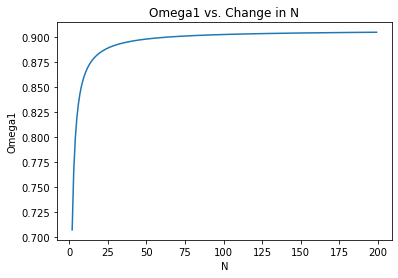

In [5]:
# Calculating effects of omega by N
Nlist = []
omega1list = []

for i in range(2,200): # Starts at 2 because that the minimum value N can be to start off.
    N = i
    m = M/N  # Put in equations for m, L0, and k because N affects them.
    L0 = L/(N+1)# By adding them the system will not change thus resulting in more accurate data.
    k = K*(N+1)
    omegas, a = geteigen()
    Nlist.append(N)
    omega1list.append(omegas[0])
    
    
plt.title('Omega1 vs. Change in N')
plt.xlabel('N')
plt.ylabel('Omega1')
plt.plot(Nlist,omega1list)
plt.show()


# cant do curve fit since result is not a function/ approaches a value.

## Question 2

For this question I will be calculating the effects of changing K(stiffness) on the fundamental frequency. The first difference between this question and the previous one is that N(number of masses) is going to be set to 100. The reason for doing this is because $\omega$ plateaus around 100 N. This allows me to get better results since $\omega$ will not be drastically altered by N when updating the system. Just like in the previous question I created two lists holding the stiffness values and the frequencies. I called geteigen and then stored and graphed my results. 

### Results for Question 2

Looking at my graphed results, I did not see the frequency approach a single value. Instead the graph appears to be approaching infinity. Another part of the graph that caught my attention was the overall shape of the graph. The graph looked very similar to square root function.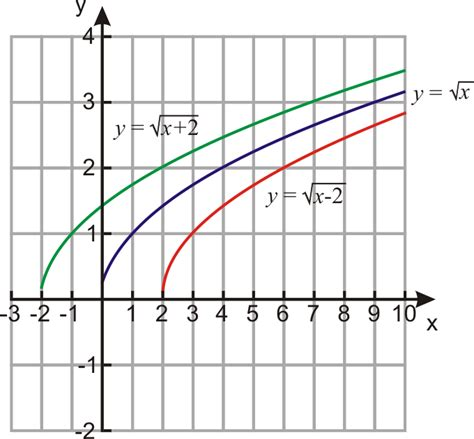 

To test that this is indeed the case I added a curve fit that represents the square root function. Using the package lamda I am able to set a variable equal to a function. Of cource this means that the variable model1 will be assigned the equation $ \sqrt{x} * a$. To make sure the curve fit works properly I have to put in a guess. When using curve fits the number of constants in an equation is directly proportional to the number of guesses used in the curve fit. The purpose of these guesses is to allow the user to manually manipulate the shape of the curve fit so that it can be in almost perfect symmetry with the previous graph created. Since I am only using one parameter my list of guesses will only be of length 1. Also the defualt value for guesses is 1 so whenever a curve fit is going to be used, the first values for each indecy in the guess list is set to 1. To my suprise having 1 as the default value for the curve fit actually aligned it perfectly with my original graph. I was also able to obtain the curve fit parameter value, which is 0.22158744. From looking at how the graph is structured and how the square root curve fit aligns with the original graph. I can conclude that the fundamental frequency($\omega_1$) is dependant on the stiffness(k).

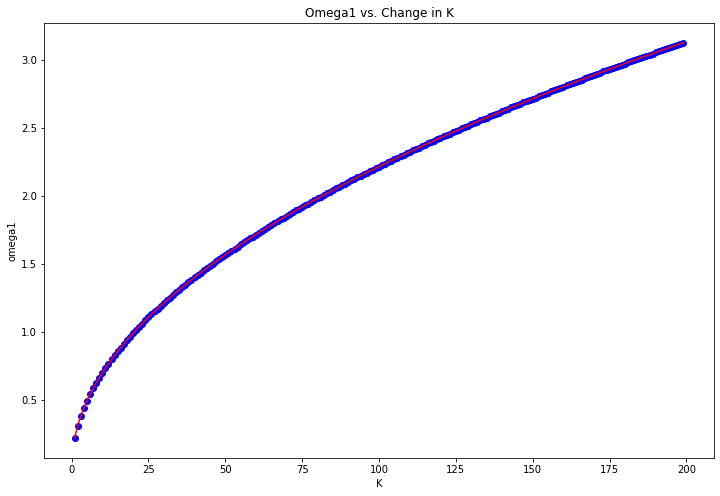

[0.22158744]


In [40]:
# Calculating effects of omega by K


N =100 # By using N here I am setting the system to a better state since N is pretty flat at N = 100.
Klist = []
omega1list = []

for i in range(1,200):
    K = i
    m = M/N # called so that the system stays the same
    L0 = L/(N + 1)
    k = K*(N+1)
    omegas, a = geteigen()
    Klist.append(K)
    omega1list.append(omegas[0])

model1 = lambda x,a: np.sqrt(x) * a # this is the equation for the curve fit.
guess1 = [1] # I believe guess is only 1 parameter since there is only on constant. 
xdata1 = Klist[:] # xdata1 and ydata1 are for the curve fit but they could be wrong.
ydata1 = omega1list[:]

params,covariance = curve_fit(model1,xdata1,ydata1,guess1) # creates curve fit.

fig = plt.figure(figsize=(12,8))
plt.plot(Klist,omega1list,'bo')
plt.plot(xdata1,ydata1, 'r-')
plt.title('Omega1 vs. Change in K')
plt.xlabel('K')
plt.ylabel('omega1')
plt.show()

print(params)

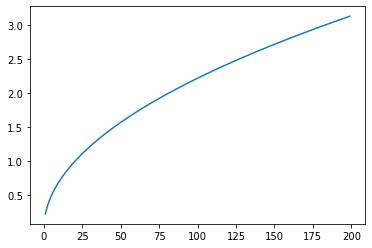

In [41]:
plt.plot(Klist,omega1list)

## Question 3

For the last question I will determine if the fundamental frequency $\omega_1$ is dependant on the total mass of the system(M). Just like question 2 I created two lists to hold the M values and the $\omega$ values. The difference between question 2 and qustion 3 is that question 3 has to have its stiffness set to equal 1. The reason for this is because I did not use functions to hold the code for each question. This means that by not setting K back to 1, the code for question 3 would use the last updated k value from the previous question. The same procedure for questions 1 and 2 are going to be used on question 3 where inside the loop I will update the system and store the returned value from geteigen and from M. 

### Results for Question 3

After running the code I then made a graph so that I could have a visual representation of axatly what was going on to the fundamental frequency. Looking at the graph it seems that as the total mass of the system gets larger, thee fundamental frequency will decrease. The graph also resembles the equation $\frac{1}{x}$.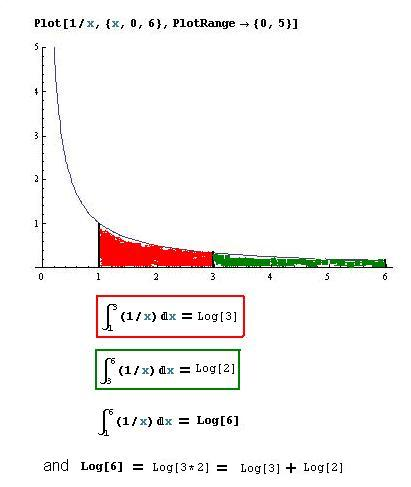 

To prove that my speculation is valid I created a curve fit. Using lamda I set the variable model2 to be assigned the equation $\frac{1}{x} * a$. Since there is only 1 constant in the equation the list guess will only have a length of 1 and its value will be set to default. After running the curve fit I was able to align the curve fit to the original graph. This also validates that the fundemental frequency($\omega_1$) is dependant on the total mass of the system(M). I was also able to find that the parameter coefficent was equal to 4.70957975. 

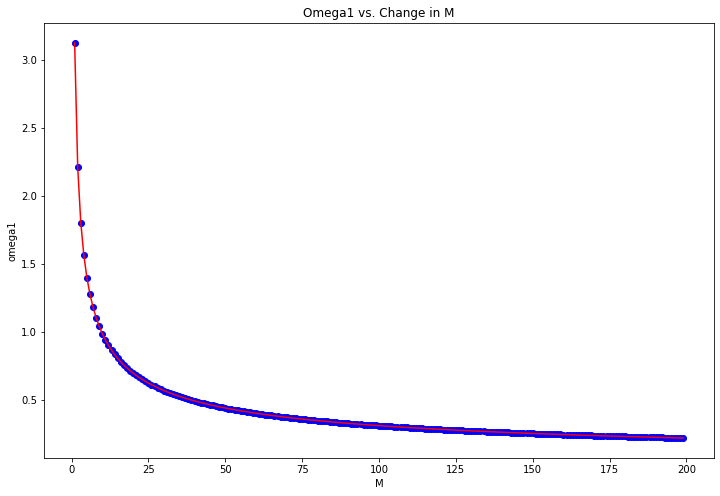

[4.70957975]


In [46]:
#  Calculating effects of omega by M
N = 100
K = 1 # have to set K to 1 so that this calculation doesnt use the k in the previuos cell. 
Mlist = []
omega1list = []

for i in range(1,200):
    M = i
    m = M/N
    L0 = L/(N + 1)
    k = K*(N+1)
    omegas, a = geteigen()
    Mlist.append(M)
    omega1list.append(omegas[0])
    
model2 = lambda x,a: 1/x * a
guess2 = [1]
xdata2 = Mlist
ydata2 = omega1list

params, covariance = curve_fit(model2,xdata2,ydata2,guess2)

fig = plt.figure(figsize=(12,8))
plt.plot(Mlist,omega1list,'bo')
plt.plot(xdata2,ydata2, 'r-')
plt.title('Omega1 vs. Change in M')
plt.xlabel('M')
plt.ylabel('omega1')
plt.show()


print(params)
    
    

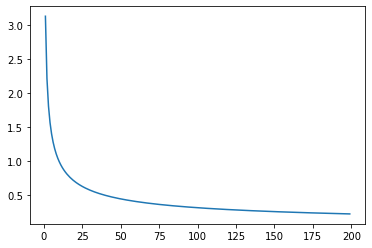

In [30]:
plt.plot(Mlist,omega1list)

# Sources

Information on eigen values and vectors: [click this link](https://byjus.com/maths/eigen-values/)

Image for coupled oscilator: [clikc this link](https://www.researchgate.net/profile/Rama-Govindarajan-3/publication/292206723/figure/fig1/AS:388750002671621@1469696631287/Normal-modes-a-A-double-pendulum-exhibiting-2-normal-modes-symmetric-and.png)

Image for square root function: [click this link](https://dr282zn36sxxg.cloudfront.net/datastreams/f-d:d1261a387da43405f834b0f898f161c010bae5f95237ba7593f6b456%2BIMAGE%2BIMAGE.1)

Image for $\frac{1}{x}$ function:[click this link](http://mathman.biz/images/gr1overx-logs.JPG)

General knowledge of both eigenvalues/vector, coupled oscillators, and modes are from Dr. Titus